In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Pre processing of data

In [12]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path  = "Fruits_Vegetables/validation"

In [13]:
img_width = 180
img_height = 180

In [14]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size = (img_height, img_width),
    batch_size = 32,
    validation_split=False,)

Found 3115 files belonging to 36 classes.


In [25]:
data_cat = data_train.class_names
# print(data_cat)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [26]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size =(img_height, img_width),
    shuffle=True,
    validation_split=False
    
)

Found 351 files belonging to 36 classes.


In [29]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size =(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split = False


)

Found 359 files belonging to 36 classes.


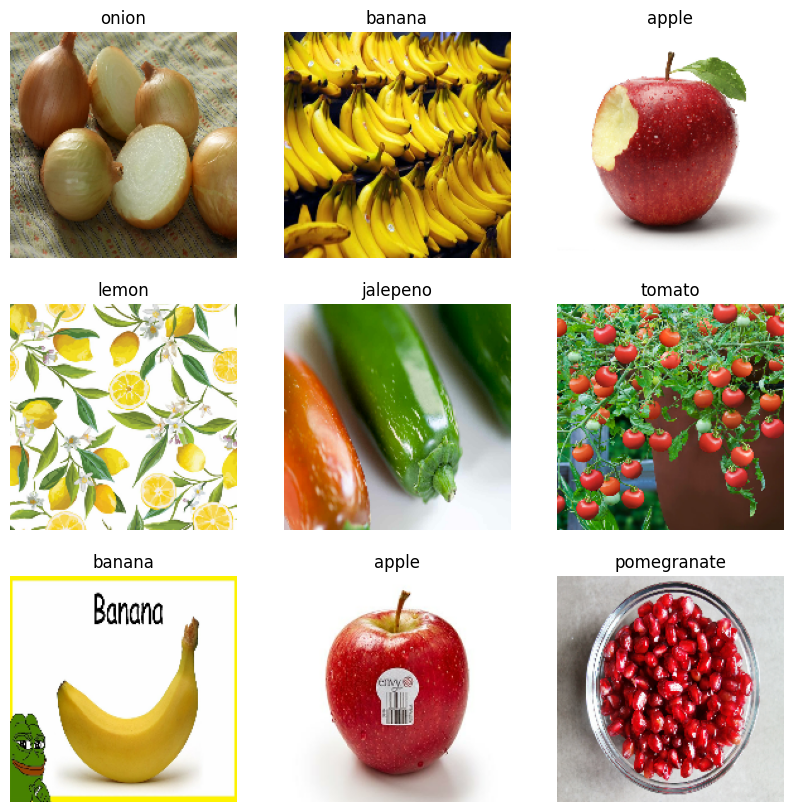

In [32]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

Model Creation (convolutional neural network)

In [33]:
from tensorflow.keras.models import Sequential

In [47]:
#Sequential Model
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [48]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [50]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.0564 - loss: 3.7386 - val_accuracy: 0.3248 - val_loss: 2.4856
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 92s 866ms/step - accuracy: 0.2515 - loss: 2.6421 - val_accuracy: 0.5812 - val_loss: 1.5256
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.4366 - loss: 1.9773 - val_accuracy: 0.7920 - val_loss: 0.8943
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 587s 6s/step - accuracy: 0.5975 - loss: 1.4405 - val_accuracy: 0.8348 - val_loss: 0.6518
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 651ms/step - accuracy: 0.7412 - loss: 0.8639 - val_accuracy: 0.8575 - val_loss: 0.5574
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 570ms/step - accuracy: 0.8517 - loss: 0.5353 - val_accuracy: 0.9174 - val_loss: 0.4411
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 555ms/step - accuracy: 0.9020 - loss: 0.3473 - val_accuracy: 0.9288 - val_loss: 0.4404
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 562ms/step - accuracy: 0.9257 - loss: 0.2797 - val_accuracy: 

Text(0.5, 1.0, 'loss')

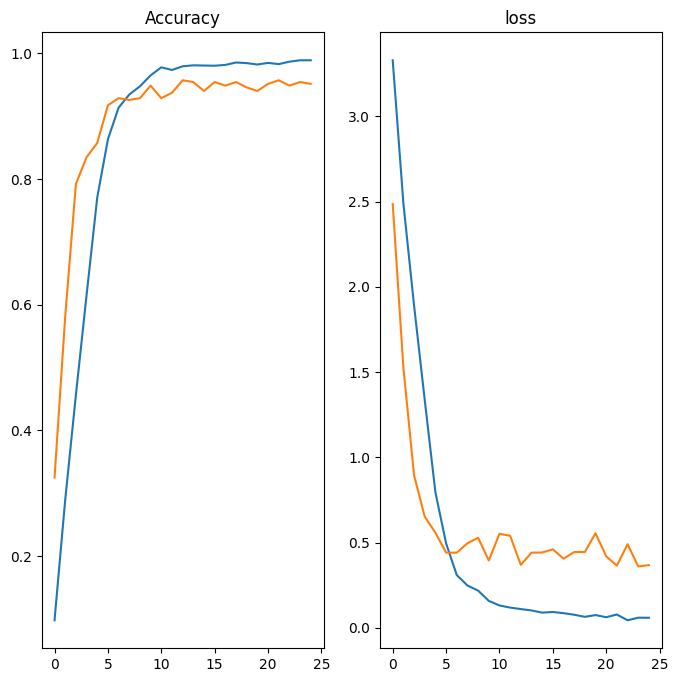

In [52]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label="Training T=Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label="Training T=Accuracy")
plt.plot(epochs_range, history.history['val_loss'], label="Validation loss")
plt.title('loss')


In [72]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

In [89]:
# image= "Apple.jpg"
# image = tf.keras.load_img(image, target_size=(img_height, img_width))
# img_arr = tf.keras.utils.array_to_img(image)
# img_bat = tf.expand_dims(img_arr, 0)

image_path = "Image_3.jpg"
image = load_img(image_path, target_size=(img_height, img_width))
img_arr = tf.keras.preprocessing.image.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [90]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [91]:
# print('veg/fruit in image is {} with accuracy of {:.2f}'.format(data_cat[np.argmax(score)], np.max((score)*100)) )
score = tf.nn.softmax(predict)
print('veg/fruit in image is {} with accuracy of {:.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

veg/fruit in image is ginger with accuracy of 99.85


In [93]:
model.save('Image_classify.keras')